Read in the data.

In [16]:
import matplotlib.pyplot as plt

def read_numbers_from_file(filename):
    with open(filename, 'r') as file:
        return [float(line.strip()) for line in file.readlines()]

nearests = read_numbers_from_file('basicNearests.txt')
furthests = read_numbers_from_file('basicFurthests.txt')

Create histograms for each.

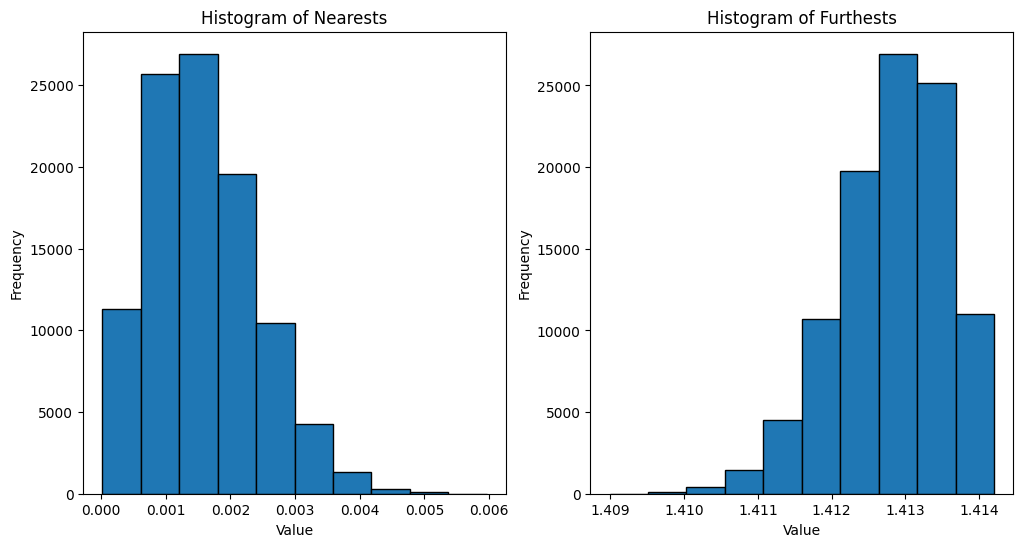

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(nearests, bins=10, edgecolor='black')
plt.title('Histogram of Nearests')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(furthests, bins=10, edgecolor='black')
plt.title('Histogram of Furthests')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()